In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

covidDf = pd.read_csv("Cleaned-Data.csv")
covidDf.head()


,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [2]:
print("Dataset size :: ", covidDf.shape)
covidDf.isna().sum()

Dataset size ::  (316800, 27)


Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
Country                    0
dtype: int64

In [3]:
covidDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [4]:
severityCols = covidDf.filter(like="Severity_").columns
severityCols

Index(['Severity_Mild', 'Severity_Moderate', 'Severity_None',
       'Severity_Severe'],
      dtype='object')

In [5]:
covidDf['Severity'] = covidDf[severityCols].values.tolist()


In [6]:
covidDf.drop(severityCols, axis = 1, inplace = True)

In [7]:
covidDf.drop("Country", axis = 1, inplace = True)

In [8]:
covidDf['Severity'].head()

0    [1, 0, 0, 0]
1    [1, 0, 0, 0]
2    [1, 0, 0, 0]
3    [0, 1, 0, 0]
4    [0, 1, 0, 0]
Name: Severity, dtype: object

In [9]:
def reducer(val):

 indMap = ["Mild", "Moderate", "None", "Severe"]
 for i in range(len(val)):
      if val[i] == 1:
         return indMap[i]
 return None

covidDf['Severity'] = covidDf['Severity'].apply(reducer)

In [10]:
covidDf['symptom-count'] = covidDf.iloc[:, :5].sum(axis = 1) + covidDf.iloc[:, 6:10].sum(axis=1)

covidDf.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes,Severity,symptom-count
0,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,0,0,1,Mild,9
1,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,0,1,0,Mild,9
2,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,1,0,0,Mild,9
3,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,0,0,1,Moderate,9
4,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,0,1,0,Moderate,9


In [11]:
severityEncoder = LabelEncoder().fit(covidDf['Severity'])

In [12]:
covidDf['Severity'] = severityEncoder.transform(covidDf['Severity'])
covidDf.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes,Severity,symptom-count
0,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,0,0,1,0,9
1,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,0,1,0,0,9
2,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,1,0,0,0,9
3,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,0,0,1,1,9
4,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,0,1,0,1,9


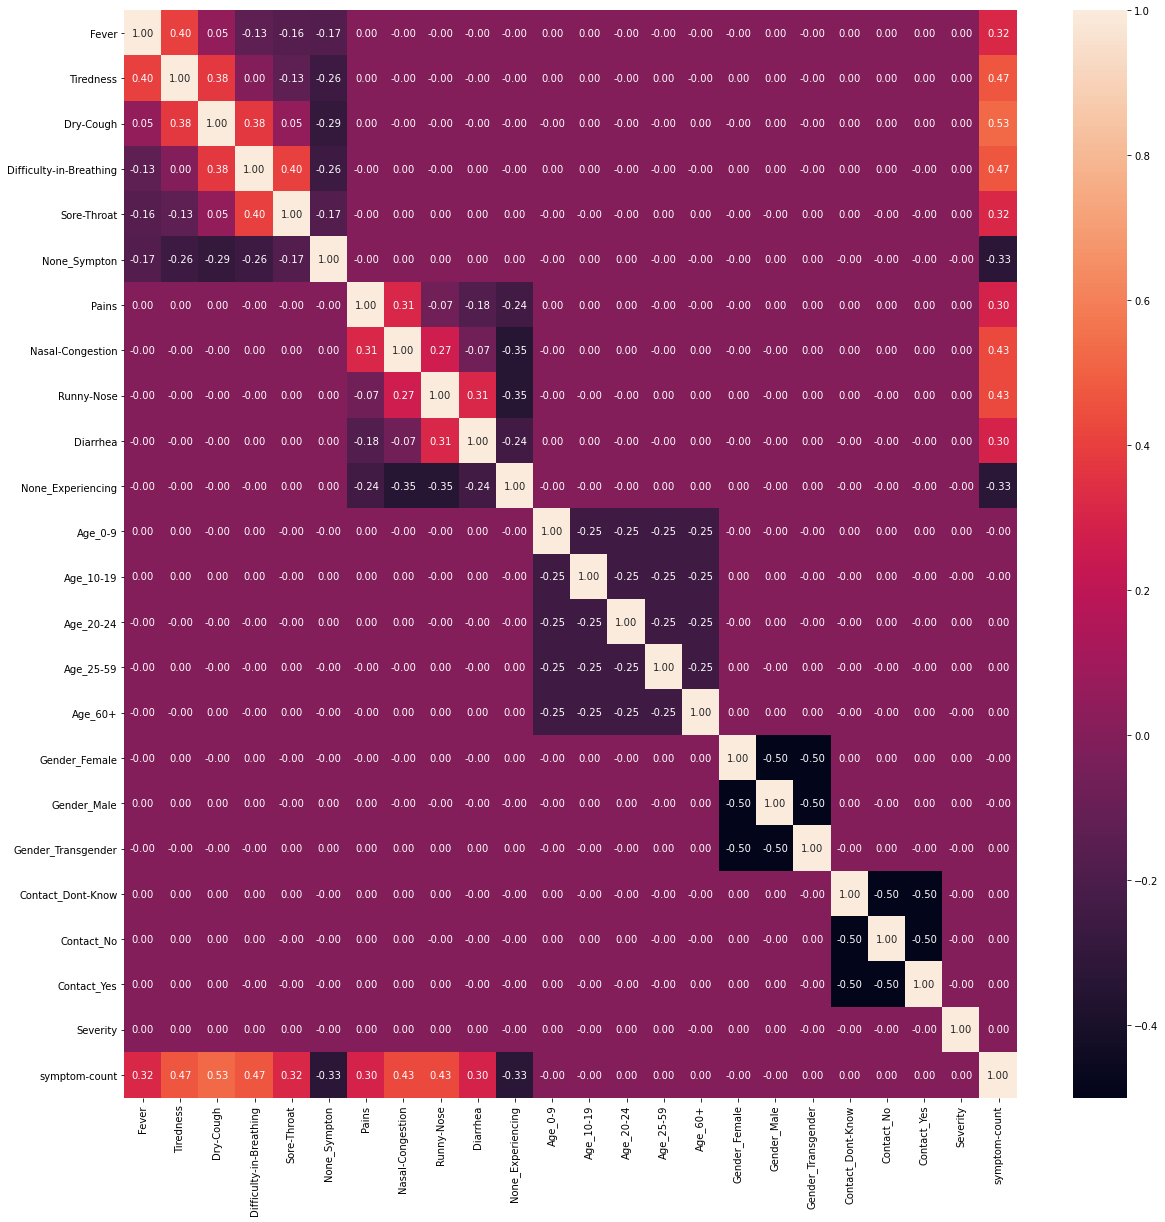

In [13]:
plt.figure(figsize=(20, 20))
sns.heatmap(covidDf.corr(), annot=True, fmt=".2f")
plt.show()

In [14]:
import csv
def getLabelEncodedCSV(df, encodingMap, filePath):
    colsNames = list(encodingMap.keys()) + ['Country']
    rowList = []
    outFile = open(filePath, "w", newline='')
    wr = csv.writer(outFile, delimiter=",")

    wr.writerow(colsNames)
    for ind, row in df.iterrows():
 # print(ind, row)
        newRow=[]
    for k, v in encodingMap.items():

        for i in v:
            if row[i] == 1:
                newRow.append(i)
                break

    newRow.append(row['Country'])
    wr.writerow(newRow)

In [15]:
newEncodingMap = {
 "symptoms" : ['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-inBreathing', 'Sore-Throat', 'None_Sympton'],
 "experiencing-symptoms" : ['Pains', 'Nasal-Congestion', 'RunnyNose', 'Diarrhea', 'None_Experiencing'],
 "age-group" : ['Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59',
'Age_60+'],
 "gender" : ['Gender_Female', 'Gender_Male', 'Gender_Transgender'],
 "contact" : ['Contact_Dont-Know', 'Contact_No', 'Contact_Yes'],
 "severity" : ['Severity_Mild', 'Severity_Moderate',
'Severity_None', 'Severity_Severe'],
 # 'country' : 'Country'
}
severity = covidDf['Severity'].to_list()
print(severity[:100])

[0, 0, 0, 1, 1, 1, 3, 3, 3, 2, 2, 2, 0, 0, 0, 1, 1, 1, 3, 3, 3, 2, 2, 2, 0, 0, 0, 1, 1, 1, 3, 3, 3, 2, 2, 2, 0, 0, 0, 1, 1, 1, 3, 3, 3, 2, 2, 2, 0, 0, 0, 1, 1, 1, 3, 3, 3, 2, 2, 2, 0, 0, 0, 1, 1, 1, 3, 3, 3, 2, 2, 2, 0, 0, 0, 1, 1, 1, 3, 3, 3, 2, 2, 2, 0, 0, 0, 1, 1, 1, 3, 3, 3, 2, 2, 2, 0, 0, 0, 1]


In [16]:
data = covidDf.drop(['Severity'], axis = 1)
data.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes,symptom-count
0,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,9
1,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,9
2,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,1,0,0,9
3,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,9
4,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,9


In [17]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, severity, test_size=0.3)


In [18]:
print("Train size :: ", X_train.shape)
print("Test size :: ", X_test.shape)

Train size ::  (221760, 23)
Test size ::  (95040, 23)


In [19]:
from sklearn.tree import DecisionTreeClassifier

# Now we can create and fit the DecisionTreeClassifier
detTree = DecisionTreeClassifier().fit(X_train, y_train)



In [20]:
preds = detTree.predict(X_test)
preds 

array([1, 0, 0, ..., 2, 0, 2])

Classification Report 
               precision    recall  f1-score   support

           0       0.15      0.21      0.17     23706
           1       0.13      0.14      0.14     23900
           2       0.12      0.10      0.11     23731
           3       0.11      0.07      0.09     23703

    accuracy                           0.13     95040
   macro avg       0.13      0.13      0.13     95040
weighted avg       0.13      0.13      0.13     95040

Accuracy ::  0.13160774410774412


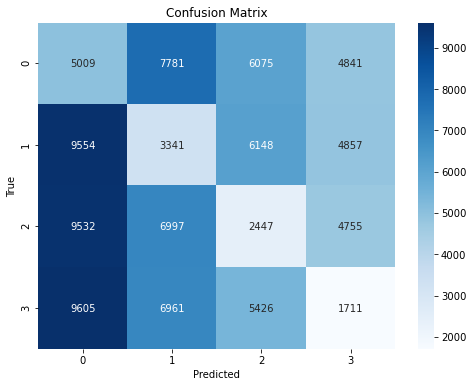

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("Classification Report \n", classification_report(y_test,
preds))
print("Accuracy :: ", sum(y_test == preds) / len(preds))

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, preds)

# Create a bar chart to represent the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
